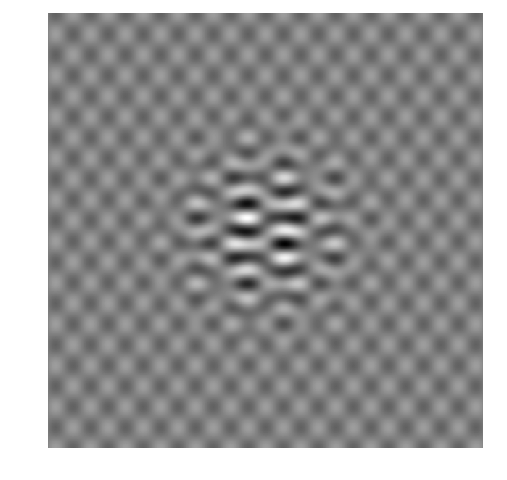

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

t = np.arange(-3,3,0.01)

#Generate image data
Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

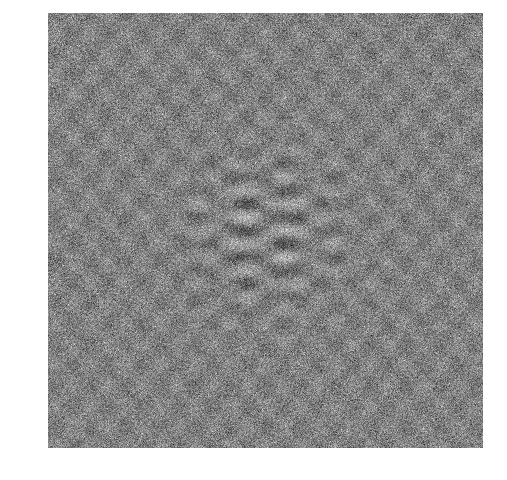

In [3]:
#Add Gaussian noise to the image
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

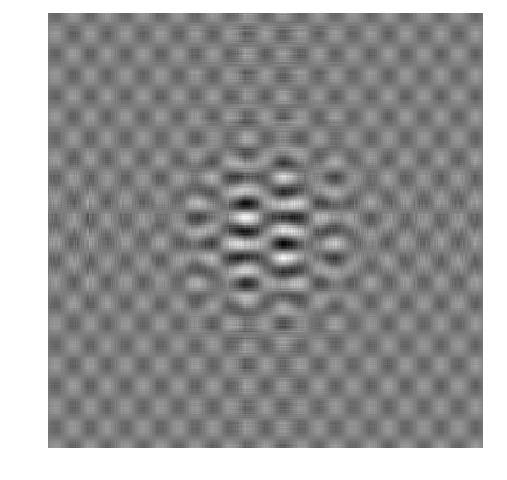

In [4]:
#Decompose noisy image using SVD
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold for square matrices, called tau in the book
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff 


#Approximate Xnoisy using hard threshold
Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] #rank-r approximation to Xnoisy
plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

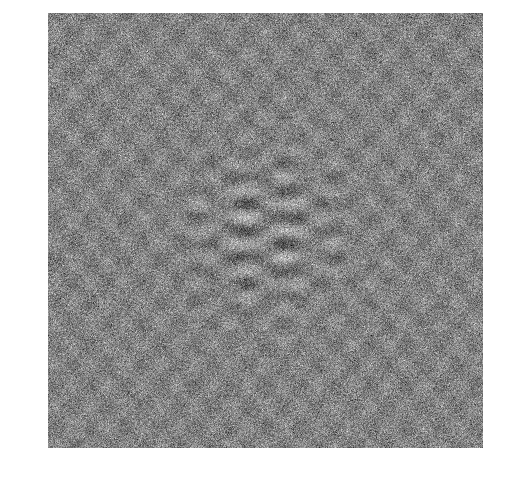

In [5]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:] #rank-r90 approximation to Xnoisy
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

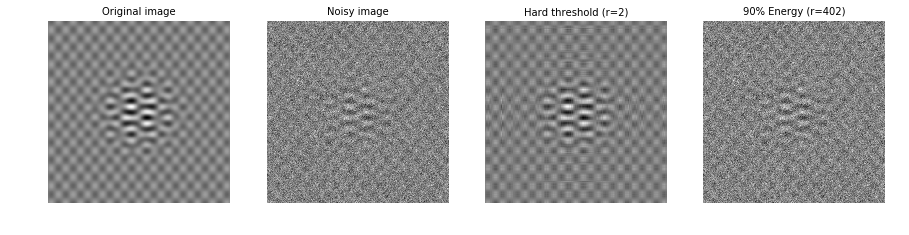

In [6]:
f,axes = plt.subplots(1,4,figsize=(15,45))
axes[0].imshow(X)
axes[1].imshow(Xnoisy)
axes[2].imshow(Xclean)
axes[3].imshow(X90)
tag=['Original image','Noisy image','Hard threshold (r=%d)' %(r+1),'90%% Energy (r=%d)' %(r90+1)]
for i in range(4):
    axes[i].axis('off')
    axes[i].set_title(tag[i],fontsize=10)

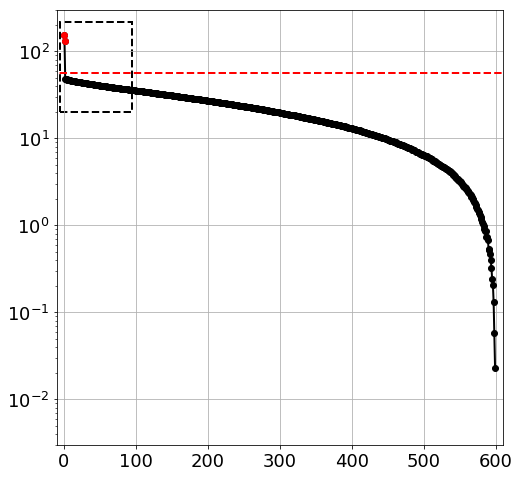

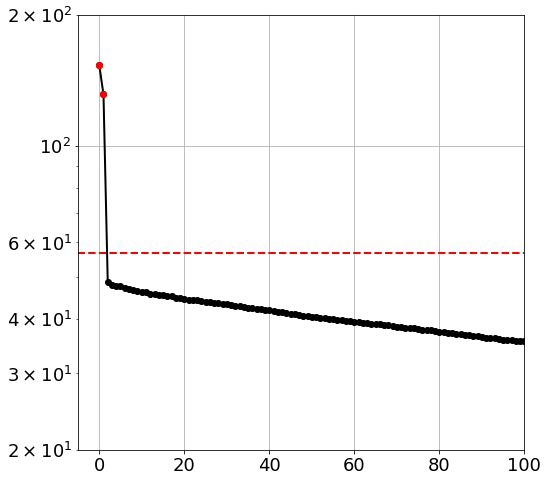

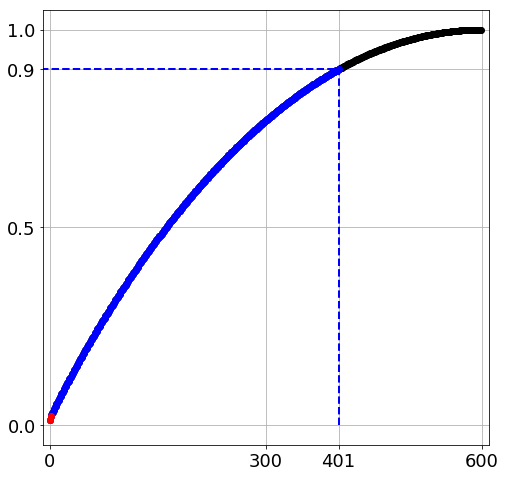

In [7]:
## Plot Singular Values
#  r is the maximum index satisfying the hard threshold tau

fig1,ax1 = plt.subplots(1)
ax1.semilogy(S,'-o', color='k', LineWidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
rect = patches.Rectangle((-5,20),100,200,LineWidth=2,LineStyle='--',FaceColor='none',EdgeColor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()

fig2,ax2 = plt.subplots(1)
ax2.semilogy(S,'-o', color='k', LineWidth=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',LineWidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',LineWidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',LineWidth=2)

ax3.grid()
plt.show()


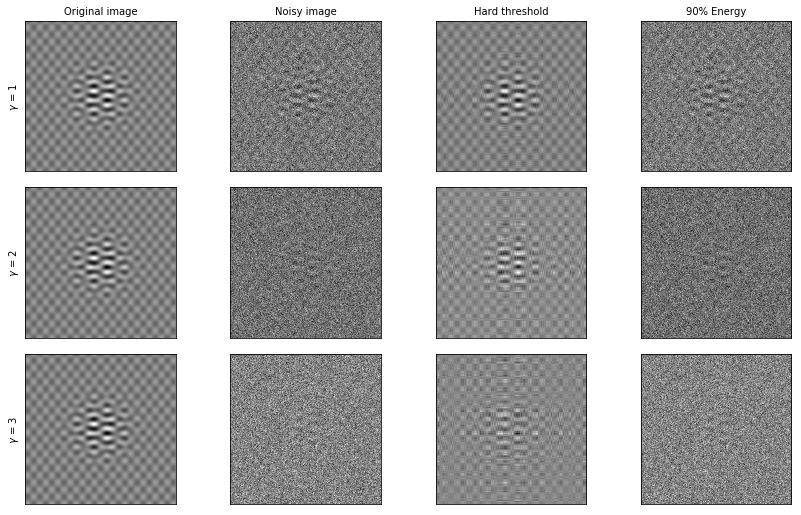

In [8]:
def vary_gamma(X,sigma,i):
    Xnoisy = X + sigma*np.random.randn(*X.shape)
    
    U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
    N = Xnoisy.shape[0]
    cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold for square matrices, called tau in the book
    r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff 
    Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]

    cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
    r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy
    X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
    
    axes[i,0].imshow(X)
    axes[i,1].imshow(Xnoisy)
    axes[i,2].imshow(Xclean)
    axes[i,3].imshow(X90)


gamma=[1,2,3]
f,axes = plt.subplots(len(gamma),4,figsize=(len(gamma)*4,len(gamma)*2.5))
for i in range(len(gamma)):
    vary_gamma(X,gamma[i],i)
    for j in range(4):
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])     
tags=['Original image','Noisy image','Hard threshold','90% Energy']
for j in range(4):
    axes[0,j].set_title(tags[j],fontsize=10)
for i in range(len(gamma)):
    axes[i,0].set_ylabel(r'$\gamma$ = %d' %gamma[i],fontsize=10)
plt.tight_layout(h_pad=0.5)